In [50]:
#loading required libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [51]:
# Load the loan approval dataset into a Pandas DataFrame.
# The dataset is assumed to be in CSV format and contains information
# such as financial and personal attributes of applicants, which will be 
# used for loan approval prediction.

data1 = pd.read_csv('loan_approval_dataset.csv')

In [52]:
data1.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [53]:
# Drop the 'loan_id' column from the dataset as it is not a relevant feature 
# for predicting loan approval outcomes. Setting inplace=True ensures the 
# modification is directly applied to the DataFrame without creating a copy.

data1.drop(columns = ['loan_id'], inplace=True)

In [54]:
data1.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [55]:
# Remove any leading or trailing spaces from the column names of the DataFrame.
# This ensures consistency and prevents potential issues when accessing columns by name.

data1.columns = data1.columns.str.strip()

In [56]:
# Create a new column 'Assets' in the dataset by summing up the values from 
# 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 
# and 'bank_asset_value' columns. This feature represents the total asset value 
# of each applicant and simplifies analysis by aggregating multiple asset-related columns.

data1['Assets'] = data1.residential_assets_value + data1.commercial_assets_value + data1.luxury_assets_value + data1.bank_asset_value

In [57]:
# Drop the individual asset-related columns ('residential_assets_value', 'commercial_assets_value', 
# 'luxury_assets_value', and 'bank_asset_value') from the dataset since their values 
# have already been aggregated into the new 'Assets' column. This reduces dimensionality 
# and simplifies the dataset for further analysis and modeling.

data1.drop(columns=['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'], inplace=True)

In [58]:
data1.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000


In [59]:
# Check for any missing values in the dataset by calculating the total number 
# of null values for each column. This helps identify if data cleaning or 
# imputation is required before proceeding with analysis or modeling.
data1.isnull().sum()

no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
Assets              0
dtype: int64

In [60]:
# Display all unique values present in the 'education' column of the dataset. 
# This helps identify the distinct categories or labels in the column, 
# which can be useful for data cleaning or encoding.
data1.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [61]:
# Define a function to clean a string by removing any leading or trailing spaces.
# This ensures consistent formatting of string values in the dataset.
def clean_data1(st):
    st = st.strip()  # Remove leading and trailing whitespace from the input string.
    return st  # Return the cleaned string.

In [62]:
# Call the clean_data1 function with the input string 'Graduate' to remove 
# any leading or trailing spaces. This is a test to ensure the function works as expected.
clean_data1('Graduate')

'Graduate'

In [63]:
# Apply the clean_data1 function to the 'education' column of the dataset. 
# This ensures that all entries in the 'education' column are cleaned by 
# removing any leading or trailing spaces, resulting in consistent formatting.
data1.education = data1.education.apply(clean_data1)

In [64]:
# Display the unique values in the 'education' column after cleaning. 
# This ensures that the cleaning process (removal of leading/trailing spaces) 
# has been applied correctly and all unique values are properly formatted.
data1.education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [65]:
# Replace the categorical values in the 'education' column with numerical values 
# for easier processing in machine learning models. 
# 'Graduate' is replaced with 1 and 'Not Graduate' is replaced with 0.
data1['education'] = data1['education'].replace(['Graduate', 'Not Graduate'], [1, 0])

/var/folders/v7/c7_xhzbn47n7kzmqg4jkhntc0000gn/T/ipykernel_8291/361123727.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1['education'] = data1['education'].replace(['Graduate', 'Not Graduate'], [1, 0])


In [66]:
# Display all unique values present in the 'self_employed' column of the dataset.
# This helps identify the distinct categories or labels, which may require cleaning 
# or encoding for consistent formatting and model readiness.
data1.self_employed.unique()

array([' No', ' Yes'], dtype=object)

In [67]:
# Apply the clean_data1 function to the 'self_employed' column to remove 
# any leading or trailing spaces from its values. This ensures consistent 
# formatting across all entries in the column.
data1.self_employed = data1.self_employed.apply(clean_data1)

In [68]:
# Display all unique values in the 'self_employed' column after applying the cleaning function.
# This ensures that the cleaning process (removal of leading/trailing spaces) was successful 
# and that the values are now consistently formatted.
data1.self_employed.unique()

array(['No', 'Yes'], dtype=object)

In [69]:
# Replace the categorical values in the 'self_employed' column with numerical values 
# for easier processing in machine learning models.
# 'No' is replaced with 0 and 'Yes' is replaced with 1.
data1.self_employed = data1.self_employed.replace(['No', 'Yes'], [0, 1])

/var/folders/v7/c7_xhzbn47n7kzmqg4jkhntc0000gn/T/ipykernel_8291/2026559081.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1.self_employed = data1.self_employed.replace(['No', 'Yes'], [0, 1])


In [70]:
# Display all unique values present in the 'loan_status' column of the dataset.
# This helps identify the distinct categories or labels, which might need cleaning or encoding.
data1.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [71]:
# Apply the clean_data1 function to the 'loan_status' column to remove any leading 
# or trailing spaces from its values. This ensures consistent formatting across all entries 
# in the column for accurate processing and analysis.
data1.loan_status = data1.loan_status.apply(clean_data1)

In [72]:
# Display all unique values in the 'loan_status' column after applying the cleaning function.
# This ensures that the cleaning process (removal of leading/trailing spaces) was successful 
# and the values are now consistently formatted.
data1.loan_status.unique()

array(['Approved', 'Rejected'], dtype=object)

In [73]:
# Replace the categorical values in the 'loan_status' column with numerical values 
# to make them suitable for machine learning models.
# 'Approved' is replaced with 1, and 'Rejected' is replaced with 0.
data1.loan_status = data1.loan_status.replace(['Approved', 'Rejected'], [1, 0])

/var/folders/v7/c7_xhzbn47n7kzmqg4jkhntc0000gn/T/ipykernel_8291/3246338191.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1.loan_status = data1.loan_status.replace(['Approved', 'Rejected'], [1, 0])


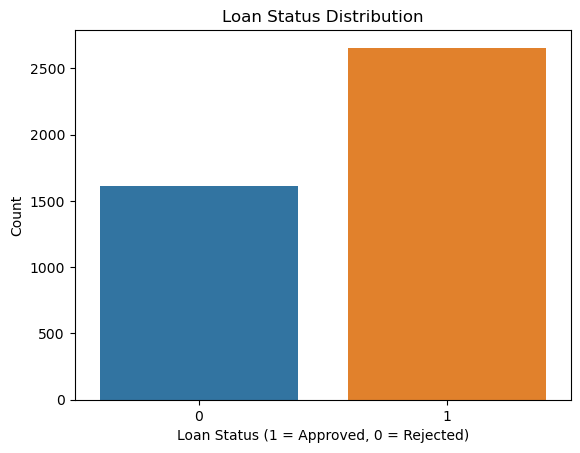

In [74]:
# Import the required libraries for data visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot to visualize the distribution of loan statuses in the dataset.
# The 'x' parameter specifies the 'loan_status' column, and 'data' specifies the dataset.
sns.countplot(x='loan_status', data=data1)

# Add a title to the plot for better context.
plt.title('Loan Status Distribution')

# Label the x-axis to indicate the meaning of the loan statuses (1 = Approved, 0 = Rejected).
plt.xlabel('Loan Status (1 = Approved, 0 = Rejected)')

# Label the y-axis to represent the count of records for each loan status.
plt.ylabel('Count')

# Display the plot to the user.
plt.show()

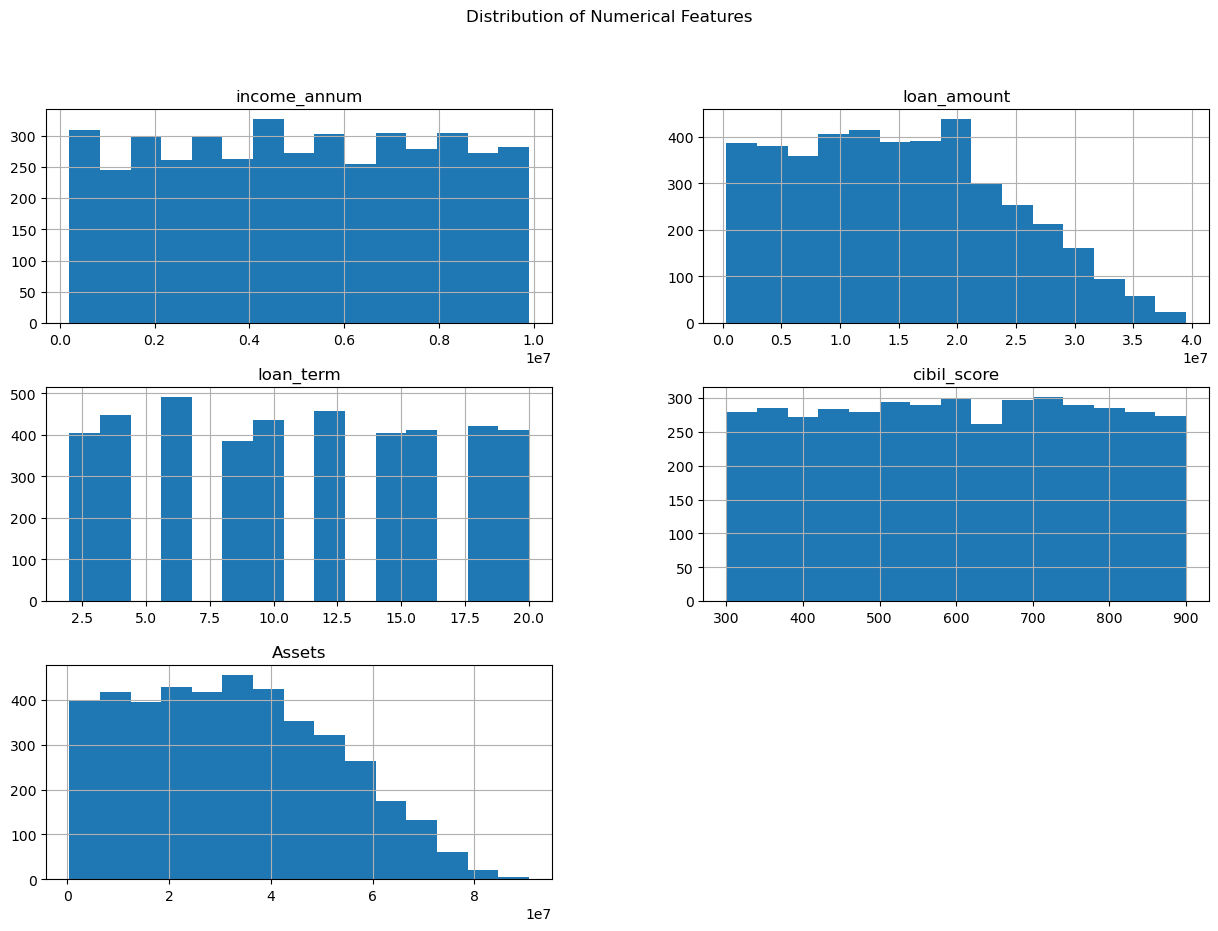

In [75]:
# Define a list of numerical features to analyze their distributions in the dataset.
numerical_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'Assets']

# Create histograms for each numerical feature to visualize their distributions.
# The 'bins' parameter specifies the number of bins for the histogram.
# The 'figsize' parameter adjusts the overall size of the plot.
data1[numerical_features].hist(bins=15, figsize=(15, 10))

# Add a title to the entire plot to indicate the purpose of the visualization.
plt.suptitle('Distribution of Numerical Features')

# Display the plot to the user.
plt.show()

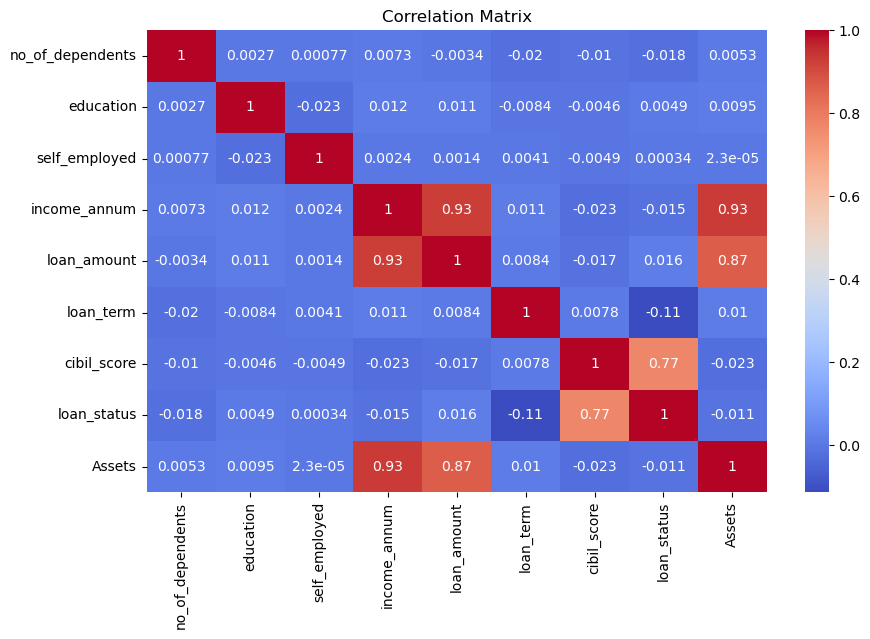

In [76]:
# Calculate the correlation matrix for the dataset to measure the strength 
# and direction of relationships between numerical features.
correlation_matrix = data1.corr()

# Create a new figure with a specified size to make the heatmap visually clear.
plt.figure(figsize=(10, 6))

# Generate a heatmap to visualize the correlation matrix.
# The 'annot=True' parameter displays the correlation values on the heatmap.
# The 'cmap' parameter specifies the color palette for the heatmap.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add a title to the heatmap to describe its purpose.
plt.title('Correlation Matrix')

# Display the heatmap to the user.
plt.show()

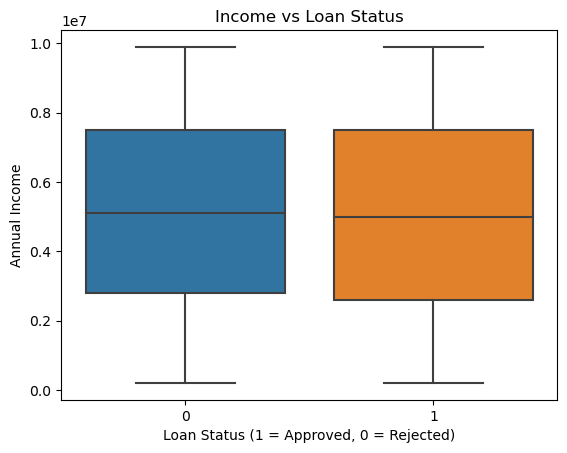

In [77]:
# Create a box plot to analyze the relationship between 'income_annum' (annual income)
# and 'loan_status' (approval or rejection status).
# The 'x' parameter represents the loan status categories (1 = Approved, 0 = Rejected),
# and the 'y' parameter represents the annual income values.
sns.boxplot(x='loan_status', y='income_annum', data=data1)

# Add a title to the plot to indicate its purpose.
plt.title('Income vs Loan Status')

# Label the x-axis to clarify the meaning of loan status categories.
plt.xlabel('Loan Status (1 = Approved, 0 = Rejected)')

# Label the y-axis to represent the annual income values.
plt.ylabel('Annual Income')

# Display the plot to the user.
plt.show()

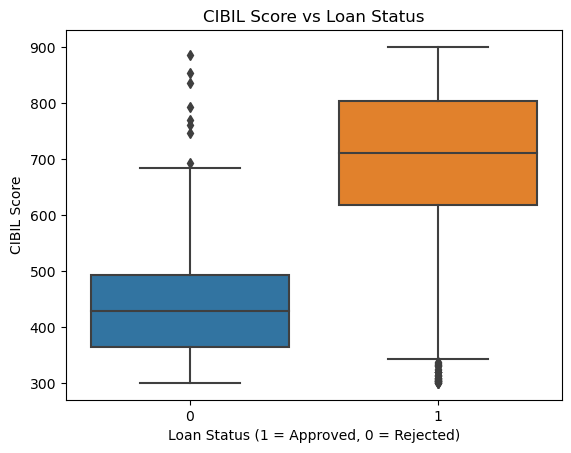

In [78]:
# Create a box plot to analyze the relationship between 'cibil_score' 
# (a measure of creditworthiness) and 'loan_status' (approval or rejection status).
# The 'x' parameter represents the loan status categories (1 = Approved, 0 = Rejected),
# and the 'y' parameter represents the CIBIL score values.
sns.boxplot(x='loan_status', y='cibil_score', data=data1)

# Add a title to the plot to indicate its purpose.
plt.title('CIBIL Score vs Loan Status')

# Label the x-axis to clarify the meaning of loan status categories.
plt.xlabel('Loan Status (1 = Approved, 0 = Rejected)')

# Label the y-axis to represent the CIBIL score values.
plt.ylabel('CIBIL Score')

# Display the plot to the user.
plt.show()

In [79]:
# Create the input data by dropping the 'loan_status' column from the dataset.
# This ensures that only independent variables are used for training the machine learning model.
input_data1 = data1.drop(columns=['loan_status'])

# Create the output data by selecting the 'loan_status' column from the dataset.
# This serves as the target variable that the model will learn to predict.
output_data1 = data1['loan_status']

In [80]:
input_data1.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Assets
0,2,1,0,9600000,29900000,12,778,50700000
1,0,0,1,4100000,12200000,8,417,17000000
2,3,1,0,9100000,29700000,20,506,57700000
3,3,1,0,8200000,30700000,8,467,52700000
4,5,0,1,9800000,24200000,20,382,55000000


In [81]:
output_data1.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [82]:
# Split the dataset into training and testing sets using the train_test_split function.
# 'input_data1' contains the features (independent variables), and 'output_data1' contains the target variable.
# The test_size=0.2 parameter specifies that 20% of the data will be used for testing,
# while the remaining 80% will be used for training.
x_train, x_test, y_train, y_test = train_test_split(input_data1, output_data1, test_size=0.2)

In [83]:
# Display the shape (number of rows and columns) of the training and testing feature sets.
# This helps confirm that the dataset was split correctly into training and testing subsets,
# with 80% of the data allocated for training and 20% for testing.
x_train.shape, x_test.shape

((3415, 8), (854, 8))

In [84]:
y_train.shape, y_test.shape

((3415,), (854,))

In [85]:
# Initialize a StandardScaler object to standardize the features.
# StandardScaler scales the data so that it has a mean of 0 and a standard deviation of 1, 
# ensuring that features with different ranges do not dominate the model training process.
scaler = StandardScaler()

# Fit the scaler to the training data and transform it to scale the features.
# This ensures the model training is done on standardized data.
x_train_scaled = scaler.fit_transform(x_train)

# Use the same scaler to transform the testing data. 
# The scaler is not refitted to prevent data leakage from the test set into the training process.
x_test_scaled = scaler.transform(x_test)

In [86]:
# Define a function to evaluate the performance of a machine learning model.
# This function calculates various metrics and visualizes the ROC curve (if applicable).

def evaluate_model(model, X_test, y_test, model_name):
    # Generate predictions for the test set using the model.
    y_pred = model.predict(X_test)
    
    # Generate predicted probabilities for the positive class (if the model supports it).
    # The second column of predict_proba() output corresponds to the probability of class 1.
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate evaluation metrics.
    accuracy = accuracy_score(y_test, y_pred)      # Overall accuracy of the model.
    precision = precision_score(y_test, y_pred)    # Precision: How many predicted positives are correct.
    recall = recall_score(y_test, y_pred)          # Recall: How many actual positives are identified correctly.
    f1 = f1_score(y_test, y_pred)                  # F1-Score: Harmonic mean of precision and recall.
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None  # AUC-ROC score, if probabilities are available.

    # Print the calculated metrics for the model.
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"AUC-ROC: {auc:.2f}" if auc else "AUC-ROC: Not Applicable")

    # If predicted probabilities are available, plot the ROC curve.
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)  # Compute false positive rate and true positive rate.
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')  # Plot the ROC curve.
        plt.plot([0, 1], [0, 1], 'k--')  # Plot a diagonal line representing random performance.
        plt.title(f'ROC Curve: {model_name}')  # Title for the ROC curve plot.
        plt.xlabel('False Positive Rate')      # Label for the x-axis.
        plt.ylabel('True Positive Rate')      # Label for the y-axis.
        plt.legend()                          # Add a legend to the plot.
        plt.show()                            # Display the plot.


Model: Decision Tree
Accuracy: 0.98
Precision: 0.99
Recall: 0.99
F1-Score: 0.99
AUC-ROC: 0.98


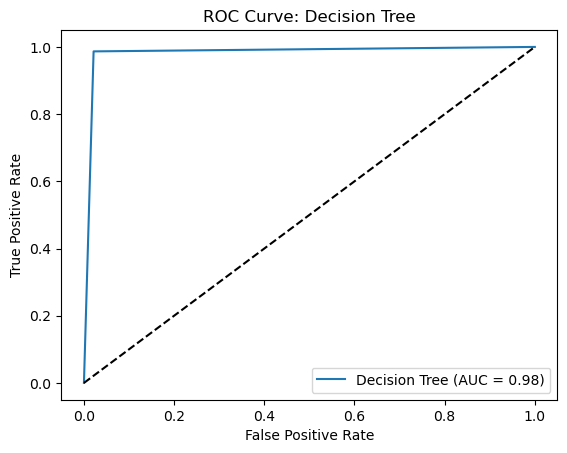

In [87]:
# Initialize a Decision Tree Classifier model with a fixed random state for reproducibility.
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model using the scaled training data and corresponding labels.
decision_tree.fit(x_train_scaled, y_train)

# Evaluate the performance of the trained Decision Tree model on the scaled testing data.
# The evaluation includes calculating metrics (e.g., accuracy, precision, recall) 
# and plotting the ROC curve (if applicable).
evaluate_model(decision_tree, x_test_scaled, y_test, "Decision Tree")

In [88]:
# Import necessary libraries for model hyperparameter tuning.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # For exhaustive and randomized search for hyperparameters.
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model for classification tasks.
import xgboost as xgb  # XGBoost library for gradient boosting.

# Define a parameter grid for hyperparameter tuning of the Decision Tree model.
# These parameters include:
# - 'max_depth': The maximum depth of the tree.
# - 'min_samples_split': The minimum number of samples required to split an internal node.
# - 'min_samples_leaf': The minimum number of samples required to be at a leaf node.
# - 'criterion': The function to measure the quality of a split ('gini' or 'entropy').
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Define a parameter grid for hyperparameter tuning of the XGBoost model.
# These parameters include:
# - 'n_estimators': The number of trees in the model.
# - 'learning_rate': The step size shrinkage used in updates to prevent overfitting.
# - 'max_depth': The maximum depth of a tree.
# - 'subsample': The fraction of samples used for training each tree.
# - 'colsample_bytree': The fraction of features used for training each tree.
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [89]:
# Initialize a GridSearchCV object for hyperparameter tuning of the Decision Tree Classifier.
# Parameters:
# - estimator: The Decision Tree Classifier model to be optimized.
# - param_grid: The dictionary of hyperparameters (dt_param_grid) to search through.
# - scoring: Use 'roc_auc' as the evaluation metric to optimize for the Area Under the ROC Curve.
# - cv: Perform 5-fold cross-validation to ensure robust evaluation.
# - verbose: Set verbosity level to 1 for progress updates during the search.
# - n_jobs: Use all available CPU cores (-1) to speed up the computation.
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=dt_param_grid,
                              scoring='roc_auc',
                              cv=5,
                              verbose=1,
                              n_jobs=-1)

# Fit the GridSearchCV object on the training data to find the best combination of hyperparameters.
grid_search_dt.fit(x_train_scaled, y_train)

# Print the best hyperparameters found during the grid search.
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)

# Print the best AUC-ROC score achieved with the optimal hyperparameters.
print("Best AUC-ROC Score for Decision Tree:", grid_search_dt.best_score_)

# Retrieve the Decision Tree model with the best hyperparameters.
best_dt = grid_search_dt.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best AUC-ROC Score for Decision Tree: 0.99500021119226


In [90]:
# Initialize a RandomizedSearchCV object for hyperparameter tuning of the XGBoost Classifier.
# Parameters:
# - estimator: The XGBoost Classifier model to be optimized.
# - param_distributions: The dictionary of hyperparameters (xgb_param_grid) to search through.
# - scoring: Use 'roc_auc' as the evaluation metric to optimize for the Area Under the ROC Curve.
# - cv: Perform 5-fold cross-validation to ensure robust evaluation.
# - n_iter: The number of random combinations of hyperparameters to try (set to 50 for this search).
# - verbose: Set verbosity level to 1 for progress updates during the search.
# - n_jobs: Use all available CPU cores (-1) to speed up the computation.
# - random_state: Set a random state for reproducibility of the results.
random_search_xgb = RandomizedSearchCV(estimator=xgb.XGBClassifier(random_state=42, use_label_encoder=False),
                                       param_distributions=xgb_param_grid,
                                       scoring='roc_auc',
                                       cv=5,
                                       n_iter=50,  # Number of combinations to try
                                       verbose=1,
                                       n_jobs=-1,
                                       random_state=42)

# Fit the RandomizedSearchCV object on the training data to find the best combination of hyperparameters.
random_search_xgb.fit(x_train_scaled, y_train)

# Print the best hyperparameters found during the random search.
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)

# Print the best AUC-ROC score achieved with the optimal hyperparameters.
print("Best AUC-ROC Score for XGBoost:", random_search_xgb.best_score_)

# Retrieve the XGBoost model with the best hyperparameters.
best_xgb = random_search_xgb.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are no

/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are no

/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are no

/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are no

/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are no

/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:29:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Best AUC-ROC Score for XGBoost: 0.9984781743632389



Model: Optimized Decision Tree
Accuracy: 0.97
Precision: 0.99
Recall: 0.95
F1-Score: 0.97
AUC-ROC: 0.99


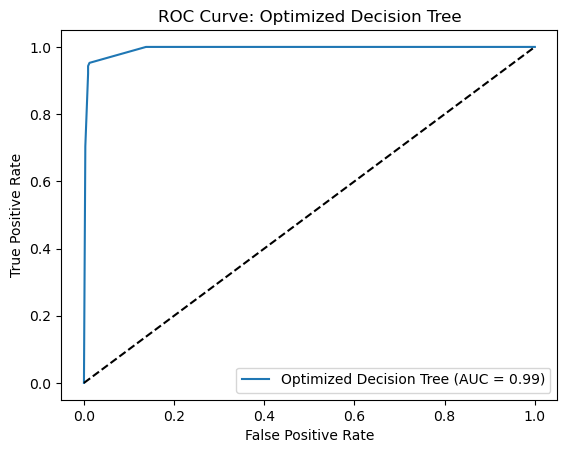


Model: Optimized XGBoost
Accuracy: 0.99
Precision: 0.98
Recall: 0.99
F1-Score: 0.99
AUC-ROC: 1.00


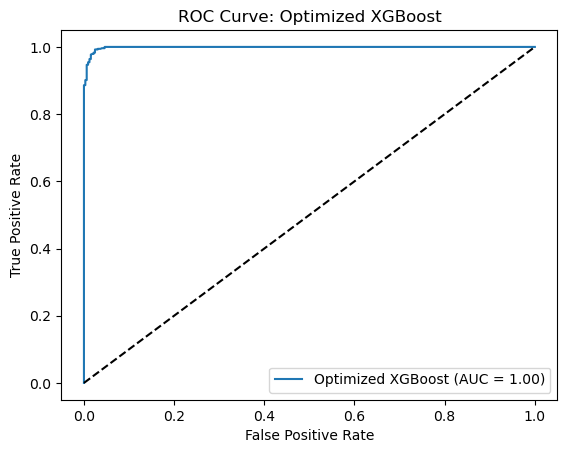

In [91]:
# Evaluate the performance of the optimized Decision Tree model.
# The 'best_dt' variable contains the Decision Tree model with the best hyperparameters
# found through GridSearchCV. The evaluation includes metrics like accuracy, precision, 
# recall, F1-score, and AUC-ROC, as well as plotting the ROC curve.
evaluate_model(best_dt, x_test_scaled, y_test, "Optimized Decision Tree")

# Evaluate the performance of the optimized XGBoost model.
# The 'best_xgb' variable contains the XGBoost model with the best hyperparameters
# found through RandomizedSearchCV. Similarly, the evaluation includes metrics and 
# visualization to assess the model's performance on the test set.
evaluate_model(best_xgb, x_test_scaled, y_test, "Optimized XGBoost")